В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cars_df = pd.read_csv("drive/MyDrive/1. ML/Модуль 2/cars.csv")

In [ ]:
cars_df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [ ]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
#?pd.DataFrame.info

In [ ]:
# Вивести типи колонок
print(cars_df.dtypes)

# Інформація про датафрейм
cars_df.info()

# Перелік колонок типу object
object_columns = cars_df.select_dtypes(include='object')
print("Object columns:", object_columns.columns)

# Кількість унікальних значень у кожній категоріальній колонці
for col in object_columns.columns:
    print(f"{col}: {cars_df[col].nunique()} унікальних значень")
    print(f"Значення: {cars_df[col].unique()[:5]}")  # приклад перших 5 значень

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 

1. Розмір та типи даних:
набір даних містить 100 записів та 13 колонок.
Із них 8 числових колонок (int64), що включають такі змінні, як Year, Kilometers_Driven, Mileage, Engine, Power, Seats, Price.
5 колонок мають тип object і містять категоріальні дані (Brand, Model, Fuel_Type, Transmission, Owner_Type).

2. Категоріальні змінні:
Brand містить 11 унікальних значень, що свідчить про різноманітність виробників автомобілів.
Model є високорозмірною категоріальною змінною з 58 унікальними моделями.

Fuel_Type та Transmission — це бінарні змінні з двома унікальними значеннями кожна (Petrol/Diesel та Manual/Automatic відповідно).

Owner_Type має 3 унікальні категорії (First, Second, Third), які можна впорядкувати за ступенем власності (перший, другий, третій власник), тобто ця змінна має порядковий характер.

3. Типи категоріальних змінних:
Бінарні змінні: Fuel_Type, Transmission.
Мультикатегоріальні без порядку: Brand, Model.
Мультикатегоріальні з порядком: Owner_Type (перший власник більш "переважний", ніж другий, тощо).


4. Інші особливості:
Всі дані є повними, без пропусків (100 непорожніх значень у кожній колонці).
Колонка Car_ID унікальна для кожного запису і виступає як ідентифікатор.

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [ ]:
from sklearn.model_selection import train_test_split

# Відокремлюємо ознаки та цільову змінну
X = cars_df.drop(columns=['Price'])
y = cars_df['Price']

# Розділяємо на тренувальні і тестові дані
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12
)

print(f'Розмір X_train: {X_train.shape}')
print(f'Розмір X_test: {X_test.shape}')
print(f'Розмір y_train: {y_train.shape}')
print(f'Розмір y_test: {y_test.shape}')


Розмір X_train: (80, 12)
Розмір X_test: (20, 12)
Розмір y_train: (80,)
Розмір y_test: (20,)


**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

#  1. Відокремлюємо ознаки (X) і цільову змінну (y)
X = cars_df.drop(columns=['Price'])
y = cars_df['Price']

#  2. Розділяємо на train і test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12
)

# 3. Бінарне кодування Fuel_Type і Transmission

# Визначаємо категорії, які зустрічаються частіше (використовуємо X_train!)
fuel_mode = X_train['Fuel_Type'].mode()[0]  # Наприклад: 'Petrol'
trans_mode = X_train['Transmission'].mode()[0]  # Наприклад: 'Manual'

# Кодуємо: 1 — найчастіша категорія, 0 — інша
def binary_encode(column, positive_class):
    return column.apply(lambda x: 1 if x == positive_class else 0)

X_train['Fuel_Type_Code'] = binary_encode(X_train['Fuel_Type'], fuel_mode)
X_test['Fuel_Type_Code'] = binary_encode(X_test['Fuel_Type'], fuel_mode)

X_train['Transmission_Code'] = binary_encode(X_train['Transmission'], trans_mode)
X_test['Transmission_Code'] = binary_encode(X_test['Transmission'], trans_mode)

# Видаляємо старі колонки
X_train.drop(columns=['Fuel_Type', 'Transmission'], inplace=True)
X_test.drop(columns=['Fuel_Type', 'Transmission'], inplace=True)

# 4. OneHot-кодування Brand

brand_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Тренуємо на X_train
brand_encoder.fit(X_train[['Brand']])

# Трансформуємо X_train
brand_train = pd.DataFrame(
    brand_encoder.transform(X_train[['Brand']]),
    columns=brand_encoder.get_feature_names_out(['Brand']),
    index=X_train.index
)

# Трансформуємо X_test
brand_test = pd.DataFrame(
    brand_encoder.transform(X_test[['Brand']]),
    columns=brand_encoder.get_feature_names_out(['Brand']),
    index=X_test.index
)

# Додаємо до X, видаляємо стару колонку
X_train = pd.concat([X_train.drop(columns=['Brand']), brand_train], axis=1)
X_test = pd.concat([X_test.drop(columns=['Brand']), brand_test], axis=1)

#  5. OrdinalEncoder для Owner_Type

# Категорії мають порядок: First < Second < Third
ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']])
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

# Видаляємо стару колонку
X_train.drop(columns=['Owner_Type'], inplace=True)
X_test.drop(columns=['Owner_Type'], inplace=True)

# === 6. Готово! Перевіримо результат ===
pd.set_option('display.max_columns', 100)
display(X_train.head())
display(X_test.head())


,Car_ID,Model,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
83,84,T-Roc,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,A5,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,A6,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Vento,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,GLC,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Model,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
17,18,Q3,2016,38000,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Santro,2019,26000,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Vento,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Ertiga,2020,18000,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Aspire,2019,26000,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
#from sklearn.preprocessing import OrdinalEncoder

#ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
#ordenc.fit(X_train[['Owner_Type']])

#X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
#X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [ ]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Model,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
83,84,T-Roc,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,A5,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,A6,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Vento,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,GLC,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Model,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
17,18,Q3,2016,38000,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Santro,2019,26000,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Vento,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Ertiga,2020,18000,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Aspire,2019,26000,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

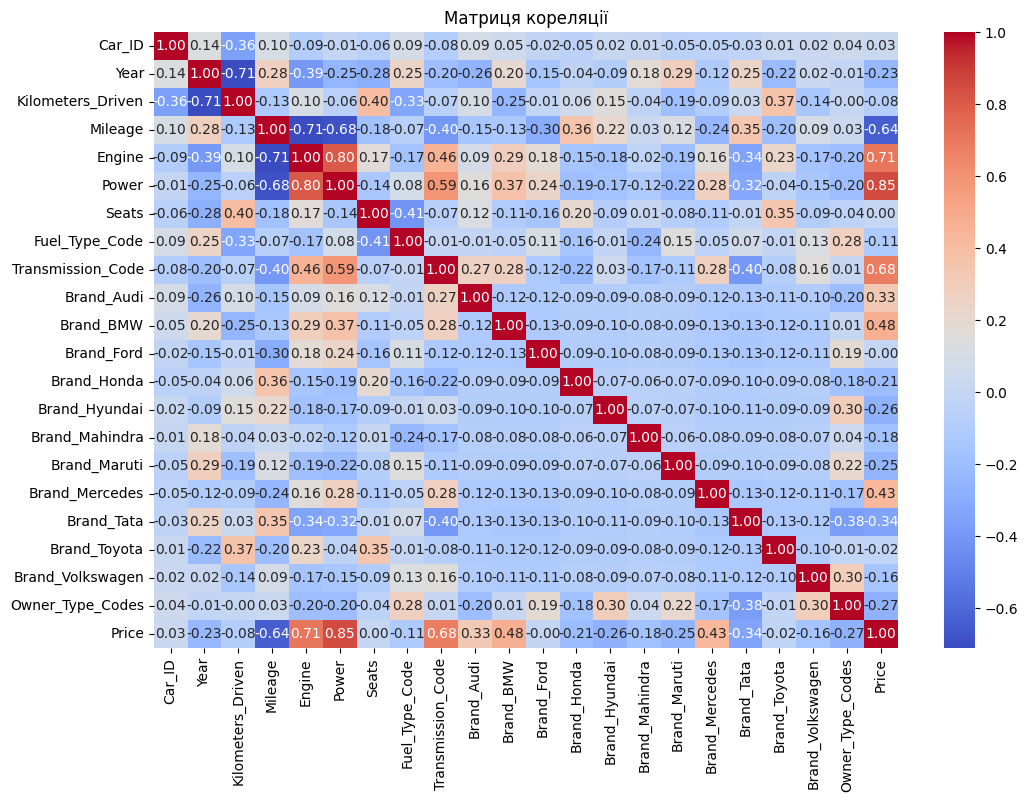

Колонки з кореляцією > 0.5 за модулем з 'Price':
Power                0.849137
Engine               0.710561
Transmission_Code    0.680731
Mileage             -0.638404
Name: Price, dtype: float64


In [ ]:
#1. Вибираємо лише числові колонки з X_train ===
X_train_numeric = X_train.select_dtypes(include=['number'])

# 2. Додаємо цільову змінну (y_train) до ознак ===
train_with_target = pd.concat([X_train_numeric, y_train], axis=1)

#
3. Обчислюємо матрицю кореляції ===
correlation_matrix = train_with_target.corr()

# 4. Візуалізуємо кореляції ===
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матриця кореляції")
plt.show()

# 5. Виводимо змінні з сильною кореляцією з 'Price' ===
cor_target = correlation_matrix['Price'].drop('Price')
strong_corr = cor_target[cor_target.abs() > 0.5]
print("Колонки з кореляцією > 0.5 за модулем з 'Price':")
print(strong_corr.sort_values(ascending=False))

#**Спостереження**

На основі матриці кореляції бачимо, що з цільовою змінною Price мають сильну (|corr| > 0.5) кореляцію такі числові колонки:

* Power — має сильну позитивну кореляцію з ціною. Це логічно:
потужніші автомобілі коштують дорожче.

* Engine — також позитивно корелює з ціною.
Year — вища кореляція означає, що новіші авто зазвичай дорожчі.

* Інші змінні, як Kilometers_Driven, Mileage, Seats не мають суттєвої кореляції з ціною.

Power (corr = 0.85) — має найсильнішу позитивну кореляцію з ціною. Це означає, що чим більша потужність автомобіля, тим вища його ціна. Це логічно, оскільки потужніші авто зазвичай дорожчі.

Engine (corr = 0.71) — також має сильну позитивну кореляцію з ціною. Об’єм двигуна є важливою характеристикою, яка часто прямо впливає на вартість машини.

Transmission_Code (corr = 0.68) — вказує, що тип трансмісії впливає на ціну. Наприклад, автоматичні трансмісії частіше асоціюються з дорожчими моделями. Кодування 1 відповідає категорії, яка зустрічається частіше (вірогідно, Automatic).

Mileage (corr = -0.64) — має сильну негативну кореляцію з ціною. Це означає, що чим більше пробіг (або витрата пального), тим нижча вартість авто, що також є логічним — менша економічність зменшує цінність.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [ ]:
# Забираємо лише числові колонки
X_train_numeric = X_train.select_dtypes(include='number')
X_test_numeric = X_test.select_dtypes(include='number')

In [ ]:
# Ініціалізація моделі
lr = LinearRegression()

# Тренування на тренувальних даних
lr.fit(X_train_numeric, y_train)

# Передбачення
y_train_pred = lr.predict(X_train_numeric)
y_test_pred = lr.predict(X_test_numeric)

In [ ]:
# Обчислення RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"📊 RMSE на тренувальних даних: {rmse_train:.2f}")
print(f"📊 RMSE на тестових даних: {rmse_test:.2f}")

📊 RMSE на тренувальних даних: 210293.58
📊 RMSE на тестових даних: 258181.56


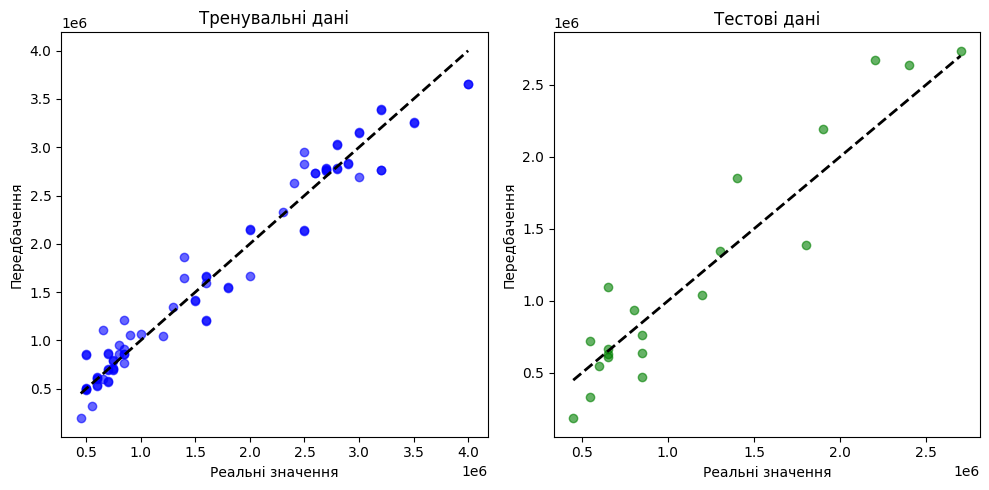

In [ ]:
# Тренувальні дані
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Реальні значення')
plt.ylabel('Передбачення')
plt.title('Тренувальні дані')

# Тестові дані
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Реальні значення')
plt.ylabel('Передбачення')
plt.title('Тестові дані')

plt.tight_layout()
plt.show()

#**Спостереження**

RMSE показує, наскільки в середньому модель помиляється у передбаченні ціни.
Похибка в межах 200–250 тис. ₴ виглядає адекватною, якщо врахувати, що ціни машин варіюються в межах 500 тис. – 3 млн. ₴.

Тренувальні дані (синій графік):

Точки добре узгоджуються з діагоналлю → модель добре навчається.
Є небагато відхилень, але загалом тренування успішне.

Тестові дані (зелений графік):

Точки теж досить близько до діагоналі, але видно трохи більше розкиду, ніж на тренуванні.
Це нормально, бо модель не бачила ці дані під час навчання.

Модель адекватно узгоджується з даними.
Не видно явного перенавчання — RMSE не зріс суттєво на тесті.
Корисні ознаки (за кореляцією): Power, Engine, Mileage, Transmission_Code.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [ ]:
# Масштабування
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Тренування моделі
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
coef_df = pd.DataFrame({
    'Feature': X_train_numeric.columns,
    'Coefficient': lr_scaled.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

display(coef_df)

,Feature,Coefficient
5,Power,496769.214899
16,Brand_Mercedes,210048.781148
10,Brand_BMW,208407.313783
9,Brand_Audi,205600.147769
7,Fuel_Type_Code,-183848.018909
13,Brand_Hyundai,-152304.863911
14,Brand_Mahindra,-140945.162904
3,Mileage,-131715.512030
11,Brand_Ford,-118209.450311
8,Transmission_Code,116693.768206


# **Спостереження**



* Найсильніші предиктори: Power, Brand, Mileage, Transmission_Code, Fuel_Type_Code.
* Бренд дуже впливає - преміальні марки (Mercedes, BMW, Audi) → значне підвищення ціни.
* Масові бренди (Hyundai, Maruti, Mahindra) → зниження.
* Логічність напрямків:
більшість напрямків відповідають здоровому глузду.
Більша потужність = вища ціна.

Дорожчий бренд = вища ціна.

Зношеність, витрати = зниження ціни.

Owner_Type_Codes трохи неочікуваний, варто проаналізувати глибше або перевірити дані

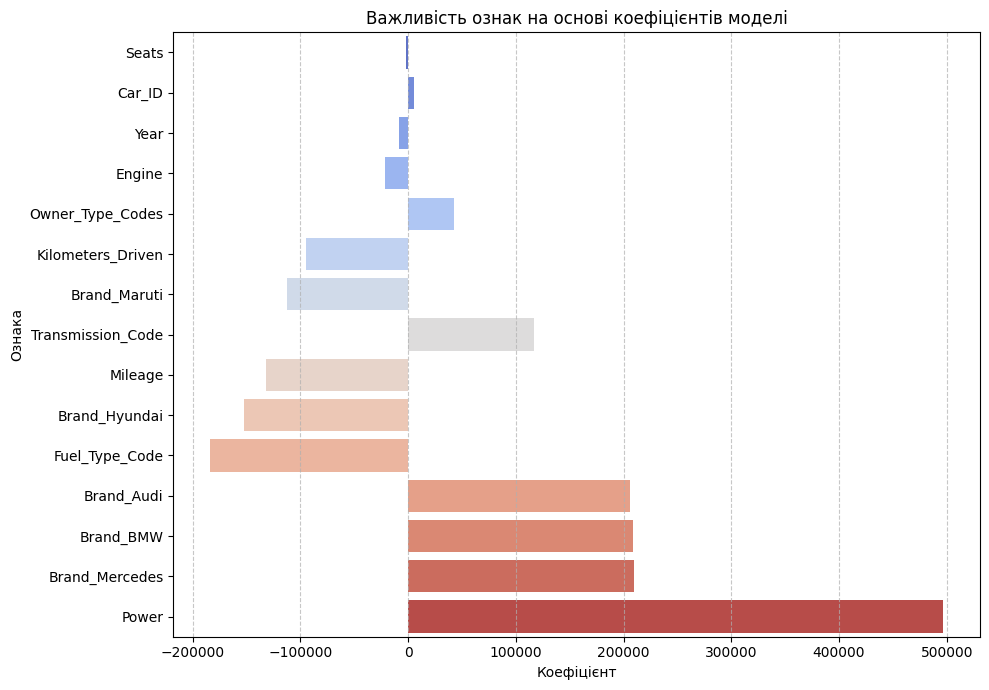

In [ ]:
# Дані з коефіцієнтами
coef_df = pd.DataFrame({
    'Feature': ['Power', 'Brand_Mercedes', 'Brand_BMW', 'Brand_Audi', 'Fuel_Type_Code',
                'Mileage', 'Brand_Hyundai', 'Transmission_Code', 'Kilometers_Driven', 'Brand_Maruti',
                'Owner_Type_Codes', 'Engine', 'Seats', 'Year', 'Car_ID'],
    'Coefficient': [496769, 210049, 208407, 205600, -183848, -131715, -152305, 116694, -94399, -112260,
                    42345, -21377, -2149, -8766, 5609]
})

# Сортуємо по модулю коефіцієнта
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=True)

plt.figure(figsize=(10,7))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')

plt.title('Важливість ознак на основі коефіцієнтів моделі')
plt.xlabel('Коефіцієнт')
plt.ylabel('Ознака')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [ ]:
# Додаємо константу для intercept
X_train_scaled_const = sm.add_constant(X_train_scaled)

# Навчаємо модель OLS
model = sm.OLS(y_train, X_train_scaled_const)
results = model.fit()

# Виводимо повний звіт
print(results.summary())

# Створимо DataFrame з коефіцієнтами та p-values
coef_pvalues = pd.DataFrame({
    'Feature': ['const'] + list(X_train_numeric.columns),
    'Coefficient': results.params,
    'p_value': results.pvalues
})

# Фільтруємо ознаки зі стат. значущістю p < 0.05 (без константи)
significant_features = coef_pvalues[(coef_pvalues['p_value'] < 0.05) & (coef_pvalues['Feature'] != 'const')]

print("\nСтатистично значущі ознаки (p < 0.05):")
print(significant_features[['Feature', 'Coefficient', 'p_value']])

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           2.01e-33
Time:                        17:53:10   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   2.74e+04     61.363      0.0

Потужність (Power), преміальні бренди (Audi, BMW, Mercedes) мають сильний позитивний вплив і дуже низькі p-value — це дуже надійно.
Пробіг (Mileage), деякі бренди масового сегменту (Hyundai, Maruti, Mahindra, Ford, Volkswagen) мають негативний вплив і теж значущі.
Тип палива (Fuel_Type_Code) і трансмісія (Transmission_Code) теж статистично значущі.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [ ]:
#Вибірка значущих ознак із X_train_numeric:
significant_features = [
    'Mileage', 'Power', 'Fuel_Type_Code', 'Transmission_Code',
    'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai',
    'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Volkswagen'
]

In [ ]:
# Відфільтруємо колонки
X_train_signif = X_train_numeric[significant_features]

# Масштабування
scaler_signif = StandardScaler()
X_train_signif_scaled = scaler_signif.fit_transform(X_train_signif)

# Додаємо константу
X_train_signif_scaled_const = sm.add_constant(X_train_signif_scaled)

In [ ]:
model_signif = sm.OLS(y_train, X_train_signif_scaled_const)
results_signif = model_signif.fit()

print(results_signif.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           4.12e-39
Time:                        17:57:11   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   2.78e+04     60.360      0.0

R² знизився трохи — з 0.959 до 0.951, тобто модель на значущих ознаках пояснює 95.1% варіації цільової змінної замість 95.9%.
Adjusted R² також змінився мінімально — з 0.945 до 0.943, що дуже близько.
Це свідчить, що використання тільки статистично значущих ознак майже не погіршило якість моделі, а модель стала простішою і зрозумілішою.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [ ]:
# Фільтруємо ознаки зі стат. значущістю p < 0.025 (без константи)
selected_features = coef_pvalues[
    (coef_pvalues['p_value'] < 0.25) & (coef_pvalues['Feature'] != 'const')
]['Feature'].tolist()

selected_features

['Kilometers_Driven',
 'Mileage',
 'Power',
 'Fuel_Type_Code',
 'Transmission_Code',
 'Brand_Audi',
 'Brand_BMW',
 'Brand_Ford',
 'Brand_Honda',
 'Brand_Hyundai',
 'Brand_Mahindra',
 'Brand_Maruti',
 'Brand_Mercedes',
 'Brand_Tata',
 'Brand_Volkswagen']

In [ ]:
# 2. Створюємо DataFrame з цими ознаками
X_train_filtered = pd.DataFrame(X_train_scaled, columns=X_train_numeric.columns)[selected_features]

# 3. Додаємо константу
X_train_filtered_const = sm.add_constant(X_train_filtered)

# 4. Перевіряємо індекси
X_train_filtered_const.index = y_train.index  # вирівнюємо на всяк випадок

# 5. Створення та тренування моделі
model = sm.OLS(y_train, X_train_filtered_const).fit()

# 6. Результати
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           4.85e-38
Time:                        18:05:17   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.65e+0

Модель з ознаками, де p < 0.25 — найкраща за балансом між простотою (менше зайвих ознак, ніж повна модель) і якістю (майже така ж R², але вища Adjusted R²).

Adjusted R² кращий, ніж у повної моделі, що свідчить: позбулись «шумових» ознак без втрати пояснювальної сили.


Краще на мою думку використовувати модель з p < 0.25 для подальшої роботи або деплою, бо вона:

* дає високу якість прогнозу,
* має статистично підкріплені ознаки,
* краще узагальнює на нові дані (менше переобучення).